In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import numpy as np



In [57]:
df = pd.read_csv("stock_data/NSEI_processed.csv")

In [58]:
X = df.drop(['Target', 'Adj Close'], axis=1)
X = X.select_dtypes(include=['float64', 'int64'])
y = df['Target']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (1339, 16) Test size: (335, 16)


In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Logistic Regression Accuracy: 0.5433
              precision    recall  f1-score   support

           0       0.53      0.34      0.41       159
           1       0.55      0.73      0.63       176

    accuracy                           0.54       335
   macro avg       0.54      0.53      0.52       335
weighted avg       0.54      0.54      0.53       335



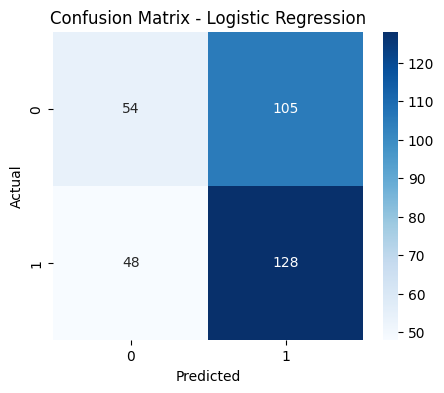


Random Forest Accuracy: 0.4896
              precision    recall  f1-score   support

           0       0.48      0.97      0.64       159
           1       0.67      0.06      0.10       176

    accuracy                           0.49       335
   macro avg       0.57      0.51      0.37       335
weighted avg       0.58      0.49      0.36       335



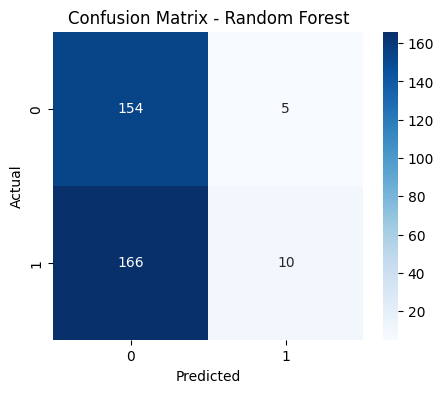


XGBoost Accuracy: 0.4896
              precision    recall  f1-score   support

           0       0.47      0.65      0.55       159
           1       0.52      0.35      0.42       176

    accuracy                           0.49       335
   macro avg       0.50      0.50      0.48       335
weighted avg       0.50      0.49      0.48       335



d:\Predictive analysis stock market\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


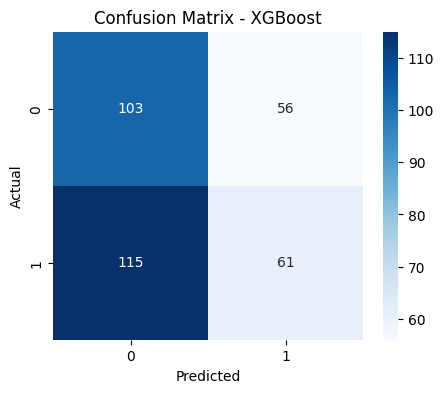

[LightGBM] [Info] Number of positive: 732, number of negative: 607
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1339, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546677 -> initscore=0.187252
[LightGBM] [Info] Start training from score 0.187252

LightGBM Accuracy: 0.5104
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       159
           1       0.53      0.53      0.53       176

    accuracy                           0.51       335
   macro avg       0.51      0.51      0.51       335
weighted avg       0.51      0.51      0.51       335



d:\Predictive analysis stock market\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


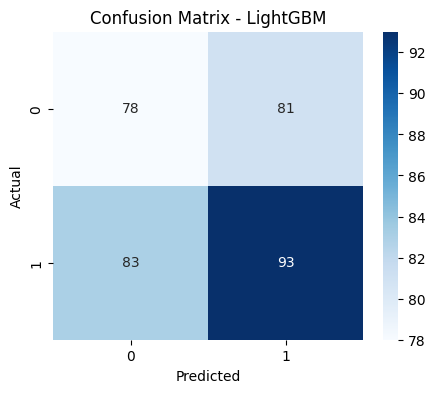

In [61]:
# Dictionary to hold models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


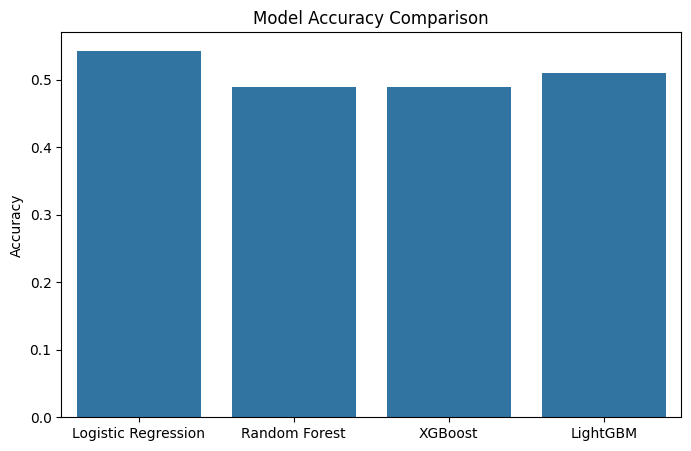

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
